<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/Hira_DS_Unit_2_Sprint_Challenge_3_Classification_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 _Lambda School Data Science Unit 2_
 
 # Classification & Validation Sprint Challenge

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

#### For this Sprint Challenge, you'll predict whether a person's income exceeds $50k/yr, based on census data.

You can read more about the Adult Census Income dataset at the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/adult

#### Run this cell to load the data:

In [0]:
import pandas as pd

columns = ['age', 
           'workclass', 
           'fnlwgt', 
           'education', 
           'education-num', 
           'marital-status', 
           'occupation', 
           'relationship', 
           'race', 
           'sex', 
           'capital-gain', 
           'capital-loss', 
           'hours-per-week', 
           'native-country', 
           'income']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                 header=None, names=columns)

df['income'] = df['income'].str.strip()

In [231]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [232]:
df.describe(include='number')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [233]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


###So education number if already the representing the education?

## Part 1 — Begin with baselines

Split the data into an **X matrix** (all the features) and **y vector** (the target).

(You _don't_ need to split the data into train and test sets here. You'll be asked to do that at the _end_ of Part 1.)

In [0]:
target = 'income'
features = ['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

y = df[target]
X = df[features]


What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You can answer this question either with a scikit-learn function or with a pandas function.)

###Majority Class Baseline###

In [235]:
y.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [0]:
majority_class = y.mode()[0] #which one happened the most

y_predict = [majority_class] * len(y)

In [237]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_predict)

0.7591904425539756

Since we haven't split the data yet we got the exact same accuracy score as with the value_counts method above. 

What **ROC AUC score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of ROC AUC.)

###ROC AUC Score###

- The ROC_AUC score would be 0.5 because that is the baseline. The Roc and Auc always runs from 0 to 1 and evaluates how well you sort your predictions. It shows that something below 0.5 is worse than random guessing and something above 0.5 is better than random.

In this Sprint Challenge, you will use **"Cross-Validation with Independent Test Set"** for your model validaton method.

First, **split the data into `X_train, X_test, y_train, y_test`**. You can include 80% of the data in the train set, and hold out 20% for the test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.80, test_size = 0.20, random_state = 42, stratify = y)

-I wanted to use 3-way holdout method but since we are not doing model selection, I will stay with2-way split

## Part 2 — Modeling with Logistic Regression!

- You may do exploratory data analysis and visualization, but it is not required.
- You may **use all the features, or select any features** of your choice, as long as you select at least one numeric feature and one categorical feature.
- **Scale your numeric features**, using any scikit-learn [Scaler](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) of your choice.
- **Encode your categorical features**. You may use any encoding (One-Hot, Ordinal, etc) and any library (category_encoders, scikit-learn, pandas, etc) of your choice.
- You may choose to use a pipeline, but it is not required.
- Use a **Logistic Regression** model.
- Use scikit-learn's [**cross_val_score**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function. For [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules), use **accuracy**.
- **Print your model's cross-validation accuracy score.**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [201]:
!pip install category_encoders

##Let's explore data and see which ones we want to use.##

In [241]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
X_train_numeric = X_train.select_dtypes(include='number')

In [243]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train_numeric, y_train)
y_pred_proba = tree.predict_proba(X_train_numeric)[:, 1] #prints out an array (The second part)
roc_auc_score(y_train, y_pred_proba)

0.8115349934491388

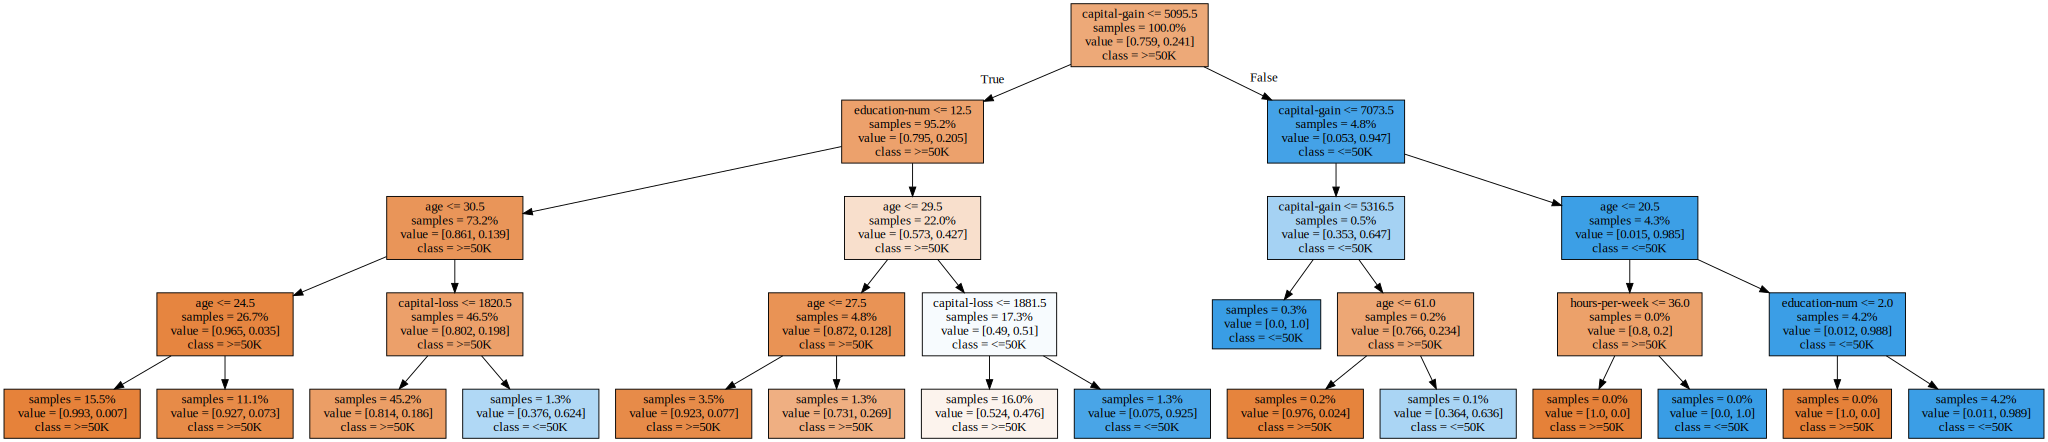

In [244]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None, feature_names=X_train_numeric.columns, 
                           class_names=['>=50K', '<=50K'], filled=True, impurity=False, proportion=True)

graphviz.Source(dot_data)

Looks like capital gain, education and age makes a big difference if person has income above $50K or not.

###Next###
- Scale your numeric features, using any scikit-learn Scaler of your choice.
- Encode your categorical features. You may use any encoding (One-Hot, Ordinal, etc) and any library (category_encoders, scikit-learn, pandas, etc) of your choice.
- You may choose to use a pipeline, but it is not required.

##Scaling

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)


##Encoding##

In [245]:
X_train.select_dtypes(exclude='number').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

- #too many in native-country, I will encode it but might want to use it later.
- #use occupation, relationship, race, and sex

In [248]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names = True),
    StandardScaler(),    
    LogisticRegression(solver = 'lbfgs', max_iter = 1000)
)

pipeline.fit(X_train, y_train) #since we encoded the categorical, we don't use x_train_numeric
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
cross_val = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=5).mean()

print('Cross_Validation_Score', cross_val)

Cross_Validation_Score 0.8503145707138353


So, Using all the features (both numeric and categorical),  we get a Cross_validation score of 0.85 .

## Part 3 — Modeling with Tree Ensembles!

Part 3 is the same as Part 2, except this time, use a **Random Forest** or **Gradient Boosting** classifier. You may use scikit-learn, xgboost, or any other library. Then, print your model's cross-validation accuracy score.

In [249]:
pipeline = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(), StandardScaler())
X_train = pipeline.fit_transform(df[features])
X_train = pd.DataFrame(X_train, columns=features)
y_train = df[target]
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,-1.884600,-1.063611,-0.991584,1.134739,-0.866082,-1.378121,-1.073040,-0.353409,-0.703071,0.148453,-0.21666,-0.035429,-0.255746
1,0.837109,-1.068746,-1.008707,-0.991584,1.134739,-0.066952,-1.082793,-0.377344,-0.353409,-0.703071,-0.145920,-0.21666,-2.222153,-0.255746
2,-0.042642,-0.252892,0.245079,-0.702025,-0.420060,0.732178,-0.787465,-1.073040,-0.353409,-0.703071,-0.145920,-0.21666,-0.035429,-0.255746
3,1.057047,-0.252892,0.425801,-0.412467,-1.197459,-0.066952,-0.787465,-0.377344,1.240627,-0.703071,-0.145920,-0.21666,-0.035429,-0.255746
4,-0.775768,-0.252892,1.408176,-0.991584,1.134739,-0.066952,-0.492138,0.318352,1.240627,1.422331,-0.145920,-0.21666,-0.035429,-0.057542


In [118]:
from sklearn.model_selection import cross_val_score

model = XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)

print(model, '\n')

score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
print('Cross-Validation Accuracy:', score, '\n')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1) 

Cross-Validation Accuracy: 0.8626271554415267 



We get a slightly higher cross-validation accuracy score using Gradient Booster than Linear Regression because Gradient Booster takes samples and trains model based on the residuals of the last sample. 

## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

In [0]:
true_negative  = 85
false_positive = 58
false_negative = 8
true_positive  = 36

actual_negative = 85+58

actual_positive = 8+36

predicted_negative = (true_negative + false_negative)
predicted_positive = (true_positive + false_positive)


Calculate accuracy

In [0]:
accuracy = (true_positive + true_negative)/ (predicted_negative + predicted_positive)

Calculate precision

In [0]:
precision = true_positive/predicted_positive
#based on relevance. precision is saying, of the elements you selected, how many are relevant

Calculate recall

In [0]:
recall = true_positive/actual_positive
#of all that are relevant, how many did you select

###Print Accuracy, Precision, & Recall###

In [124]:
print("Accuracy", accuracy, 'Precision:', precision, 'recall', recall)

Accuracy 0.6470588235294118 Precision: 0.3829787234042553 recall 0.8181818181818182


## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

### Part 2
Experiment with feature selection, preprocessing, categorical encoding, and hyperparameter optimization, to try improving your cross-validation score.

### Part 3
Which model had the best cross-validation score? Refit this model on the train set and do a final evaluation on the held out test set — what is the test score? 

### Part 4
Calculate F1 score and False Positive Rate. 

In [125]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Part1: Feature Engineering##

In [0]:
df['hard_working'] = (df['age'] >= 30) & (df['hours-per-week'] >= 40)

In [253]:
df['hard_working'].value_counts()

True     18656
False    13905
Name: hard_working, dtype: int64

In [0]:
df['rich'] = (df['hours-per-week'] ==40) & (df['capital-gain'] >=15000)

In [255]:
df['rich'].value_counts()

False    32391
True       170
Name: rich, dtype: int64

##Part2: feature Selection

The shallow tree I made in the beginning showed that capital gain, age and education makes a difference. so I would use those as my features.

In [0]:
target = 'income'

features = ['capital-gain', 'age', 'race', 'education-num', 'hard_working', 'rich']

In [0]:
y = df[target]
X = df[features]

and then further split the data.

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [266]:
pipeline = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(), StandardScaler())
X_train = pipeline.fit_transform(df[features])
X_train = pd.DataFrame(X_train, columns=features)
y_train = df[target]
X_train.head()

,capital-gain,age,race,education-num,hard_working,rich
0,0.148453,0.030671,-0.353409,1.134739,0.863329,-0.072446
1,-0.145920,0.837109,-0.353409,1.134739,-1.158307,-0.072446
2,-0.145920,-0.042642,-0.353409,-0.420060,0.863329,-0.072446
3,-0.145920,1.057047,1.240627,-1.197459,0.863329,-0.072446
4,-0.145920,-0.775768,1.240627,1.134739,-1.158307,-0.072446


In [271]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.8155154961292685 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.816037628013676 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.

So, Gradient Boosting gives the best possible cross-validation accuracy score but this is with fewer features and the engineered features as well. Now, I had trouble engineering features where I would combine string and floats to make a new column so these are not the best features that I could engineer. 

##Let's try using most of the features again:##


In [274]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,hard_working,rich
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False,False


In [273]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'hard_working',
 'rich']

In [0]:
target = 'income'
features = ['age',
 'workclass',
 'education-num',
 'marital-status',
 'occupation',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'rich'
 ]

In [0]:
y = df[target]
X = df[features]

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [280]:
pipeline = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(), StandardScaler())
X_train = pipeline.fit_transform(df[features])
X_train = pd.DataFrame(X_train, columns=features)
y_train = df[target]
X_train.head()

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,rich
0,0.030671,-1.884600,1.134739,-0.866082,-1.378121,-0.353409,-0.703071,0.148453,-0.21666,-0.035429,-0.255746,-0.072446
1,0.837109,-1.068746,1.134739,-0.066952,-1.082793,-0.353409,-0.703071,-0.145920,-0.21666,-2.222153,-0.255746,-0.072446
2,-0.042642,-0.252892,-0.420060,0.732178,-0.787465,-0.353409,-0.703071,-0.145920,-0.21666,-0.035429,-0.255746,-0.072446
3,1.057047,-0.252892,-1.197459,-0.066952,-0.787465,1.240627,-0.703071,-0.145920,-0.21666,-0.035429,-0.255746,-0.072446
4,-0.775768,-0.252892,1.134739,-0.066952,-0.492138,1.240627,1.422331,-0.145920,-0.21666,-0.035429,-0.057542,-0.072446


In [281]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.8266024886533868 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.8245449047095754 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0

In [282]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'hard_working',
 'rich']

In [0]:
target = 'income'
features = ['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'hard_working',
 'rich']

In [0]:
y = df[target]
X = df[features ]

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [286]:
pipeline = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(), StandardScaler())
X_train = pipeline.fit_transform(df[features])
X_train = pd.DataFrame(X_train, columns=features)
y_train = df[target]
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,hard_working,rich
0,0.030671,-1.884600,-1.063611,-0.991584,1.134739,-0.866082,-1.378121,-1.073040,-0.353409,-0.703071,0.148453,-0.21666,-0.035429,-0.255746,0.863329,-0.072446
1,0.837109,-1.068746,-1.008707,-0.991584,1.134739,-0.066952,-1.082793,-0.377344,-0.353409,-0.703071,-0.145920,-0.21666,-2.222153,-0.255746,-1.158307,-0.072446
2,-0.042642,-0.252892,0.245079,-0.702025,-0.420060,0.732178,-0.787465,-1.073040,-0.353409,-0.703071,-0.145920,-0.21666,-0.035429,-0.255746,0.863329,-0.072446
3,1.057047,-0.252892,0.425801,-0.412467,-1.197459,-0.066952,-0.787465,-0.377344,1.240627,-0.703071,-0.145920,-0.21666,-0.035429,-0.255746,0.863329,-0.072446
4,-0.775768,-0.252892,1.408176,-0.991584,1.134739,-0.066952,-0.492138,0.318352,1.240627,1.422331,-0.145920,-0.21666,-0.035429,-0.057542,-1.158307,-0.072446


In [287]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.8297657237028494 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.8245449047095754 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0

So, using more or most of the features in the dataset does increase the accuracy score but it is not at the 100% that I would like it to be. I need to figure out why I kept getting the error when engineering features so that we can further increase the accuracy score. 
